In [59]:
# Importing all the necessary libraries and check their versions
import sys
import numpy
import sklearn
import pandas
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Print versions of the imported libraries
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pandas.__version__))

Python: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
Numpy: 1.26.4
Sklearn: 1.4.2
Pandas: 2.2.2


In [60]:
# Import, change module names
import numpy as np
import pandas as pd
# Import the UCI Molecular Biology (Promoter Gene Sequences) Data Set
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names=names)

In [61]:
# Display a sample from the dataset
print(data.iloc[0])

Class                                                       +
id                                                        S10
Sequence    \t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
Name: 0, dtype: object


In [62]:
# Display another sample
print(data.iloc[5])

Class                                                       +
id                                                     MALEFG
Sequence    \taggggcaaggaggatggaaagaggttgccgtataaagaaactag...
Name: 5, dtype: object


In [63]:
# Building our dataset by creating a custom Pandas DataFrame
# Each column in a DataFrame is called a Series
classes = data.loc[:, 'Class']
print(classes[:5])

0    +
1    +
2    +
3    +
4    +
Name: Class, dtype: object


In [64]:
# Generate a list of DNA sequences
sequences = list(data.loc[:, 'Sequence'])
dataset = {}

# Loop through sequences and split into individual nucleotides
for i, seq in enumerate(sequences):
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t']
    nucleotides.append(classes[i])
    dataset[i] = nucleotides

# Display the first dataset entry
print(dataset[0])

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [65]:
# Turn dataset into pandas DataFrame
dframe = pd.DataFrame(dataset)
print(dframe)

   0   1   2   3   4   5   6   7   8   9    ... 96  97  98  99  100 101 102  \
0    t   t   g   a   t   a   c   t   c   t  ...   c   c   t   a   g   c   g   
1    a   g   t   a   c   g   a   t   g   t  ...   c   g   a   g   a   c   t   
2    c   c   a   t   g   g   g   t   a   t  ...   g   c   t   a   g   t   a   
3    t   t   c   t   a   g   g   c   c   t  ...   a   t   g   g   a   c   t   
4    a   a   t   g   t   g   g   t   t   a  ...   g   a   a   g   g   a   t   
5    g   t   a   t   a   c   g   a   t   a  ...   t   g   c   g   c   a   c   
6    c   c   g   g   a   a   g   c   a   a  ...   a   g   c   t   a   t   t   
7    a   c   a   a   t   a   t   a   a   t  ...   g   a   g   g   t   g   c   
8    a   t   g   t   t   g   g   a   t   t  ...   a   c   a   t   g   g   a   
9    t   g   a   g   a   g   g   a   a   t  ...   c   t   a   a   t   c   a   
10   a   a   a   t   a   a   a   a   t   c  ...   c   t   c   c   c   c   c   
11   c   c   c   g   c   g   g   c   a   c  ...   c 

In [66]:
# Transpose the DataFrame
df = dframe.transpose()
print(df.iloc[:5])

  0  1  2  3  4  5  6  7  8  9   ... 48 49 50 51 52 53 54 55 56 57
0  t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t  +
1  t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a  +
2  g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g  +
3  a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c  +
4  t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g  +

[5 rows x 58 columns]


In [67]:
# For clarity, rename the last DataFrame column to 'Class'
df.rename(columns={57: 'Class'}, inplace=True)
print(df.iloc[:5])

   0  1  2  3  4  5  6  7  8  9  ... 48 49 50 51 52 53 54 55 56 Class
0  t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t     +
1  t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a     +
2  g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g     +
3  a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c     +
4  t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g     +

[5 rows x 58 columns]


In [68]:
# Use describe() to summarize the dataset
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,c,t,+
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [69]:
#Generating counts for each column
series = []
for name in df.columns:
    series.append(df[name].value_counts())
info = pd.DataFrame(series)
details = info.transpose()
print(details)

   count  count  count  count  count  count  count  count  count  count  ...  \
t   38.0   26.0   27.0   26.0   22.0   24.0   30.0   32.0   32.0   28.0  ...   
c   27.0   22.0   21.0   30.0   19.0   18.0   21.0   20.0   22.0   22.0  ...   
a   26.0   34.0   30.0   22.0   36.0   42.0   38.0   34.0   33.0   36.0  ...   
g   15.0   24.0   28.0   28.0   29.0   22.0   17.0   20.0   19.0   20.0  ...   
+    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
-    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   

   count  count  count  count  count  count  count  count  count  count  
t   21.0   22.0   23.0   33.0   35.0   30.0   23.0   29.0   34.0    NaN  
c   36.0   42.0   31.0   32.0   21.0   32.0   29.0   29.0   17.0    NaN  
a   23.0   24.0   28.0   27.0   25.0   22.0   26.0   24.0   27.0    NaN  
g   26.0   18.0   24.0   14.0   25.0   22.0   28.0   24.0   28.0    NaN  
+    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   53

In [70]:
# Convert categorical sequence data to numerical using one-hot encoding
numerical_df = pd.get_dummies(df)
numerical_df.iloc[:5]

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,False,False,False,True,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1,False,False,False,True,False,False,True,False,False,True,...,True,False,False,False,True,False,False,False,True,False
2,False,False,True,False,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False


In [71]:
#display 60 rows of the data
numerical_df.iloc[:60]

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,False,False,False,True,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1,False,False,False,True,False,False,True,False,False,True,...,True,False,False,False,True,False,False,False,True,False
2,False,False,True,False,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
5,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,True,False
6,False,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
7,False,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
8,False,True,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,True,True,False
9,False,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False


In [72]:
# Drop the redundant class column and rename the remaining one
df = numerical_df.drop(columns=['Class_-'])
df.rename(columns={'Class_+': 'Class'}, inplace=True)
print(df.iloc[:5])

     0_a    0_c    0_g    0_t    1_a    1_c    1_g    1_t    2_a    2_c  ...  \
0  False  False  False   True   True  False  False  False  False   True  ...   
1  False  False  False   True  False  False   True  False  False   True  ...   
2  False  False   True  False  False  False  False   True   True  False  ...   
3   True  False  False  False   True  False  False  False  False  False  ...   
4  False  False  False   True  False   True  False  False  False  False  ...   

    54_t   55_a   55_c   55_g   55_t   56_a   56_c   56_g   56_t  Class  
0  False  False  False   True  False  False  False  False   True   True  
1  False   True  False  False  False   True  False  False  False   True  
2  False  False   True  False  False  False  False   True  False   True  
3  False  False  False  False   True  False   True  False  False   True  
4   True   True  False  False  False  False  False   True  False   True  

[5 rows x 229 columns]


In [73]:
# since data is already preprocessed  in 'df'
X = df.drop(columns=['Class'])
y = df['Class']

In [74]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.shape

(106, 228)


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

       False       1.00      0.55      0.71        11
        True       0.69      1.00      0.81        11

    accuracy                           0.77        22
   macro avg       0.84      0.77      0.76        22
weighted avg       0.84      0.77      0.76        22

Accuracy Score for K-Nearest Neighbors: 0.77



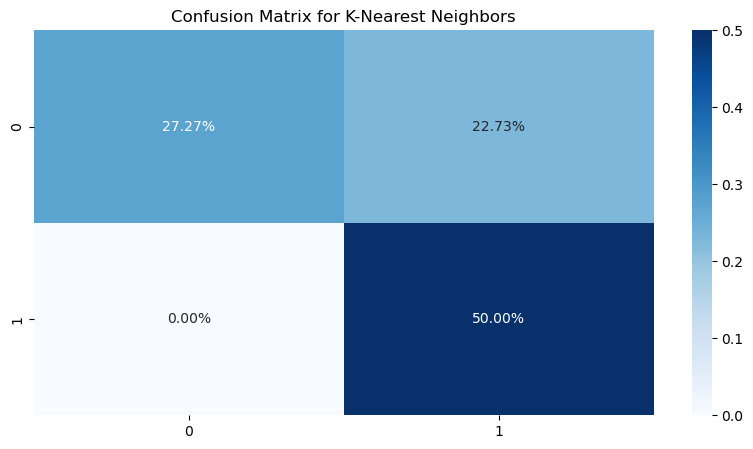

In [75]:
# 1. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test)

# Print classification report
print("\nClassification Report for K-Nearest Neighbors:")
print(classification_report(y_test, knn_predictions))

# Print accuracy score
print(f"Accuracy Score for K-Nearest Neighbors: {accuracy_score(y_test, knn_predictions):.2f}\n")

# Create and display confusion matrix
knn_cm = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize=(10, 5))
sns.heatmap(knn_cm / np.sum(knn_cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.show()


Classification Report for Multi-Layer Perceptron:
              precision    recall  f1-score   support

       False       1.00      0.82      0.90        11
        True       0.85      1.00      0.92        11

    accuracy                           0.91        22
   macro avg       0.92      0.91      0.91        22
weighted avg       0.92      0.91      0.91        22

Accuracy Score for Multi-Layer Perceptron: 0.91



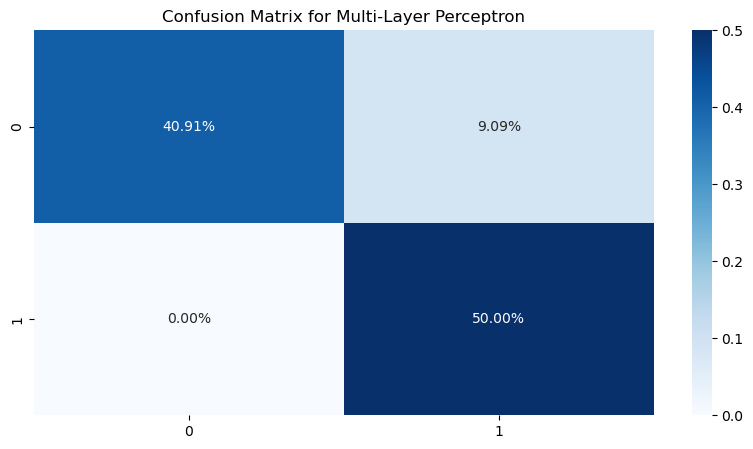

In [76]:
# 2. Multi-Layer Perceptron (MLP)
mlp_model = MLPClassifier(max_iter=500, random_state=42)

# Fit the model
mlp_model.fit(X_train, y_train)

# Make predictions
mlp_predictions = mlp_model.predict(X_test)

# Print classification report
print("\nClassification Report for Multi-Layer Perceptron:")
print(classification_report(y_test, mlp_predictions))

# Print accuracy score
print(f"Accuracy Score for Multi-Layer Perceptron: {accuracy_score(y_test, mlp_predictions):.2f}\n")

# Create and display confusion matrix
mlp_cm = confusion_matrix(y_test, mlp_predictions)
plt.figure(figsize=(10, 5))
sns.heatmap(mlp_cm / np.sum(mlp_cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix for Multi-Layer Perceptron")
plt.show()


Classification Report for Decision Tree:
              precision    recall  f1-score   support

       False       0.80      0.36      0.50        11
        True       0.59      0.91      0.71        11

    accuracy                           0.64        22
   macro avg       0.69      0.64      0.61        22
weighted avg       0.69      0.64      0.61        22

Accuracy Score for Decision Tree: 0.64



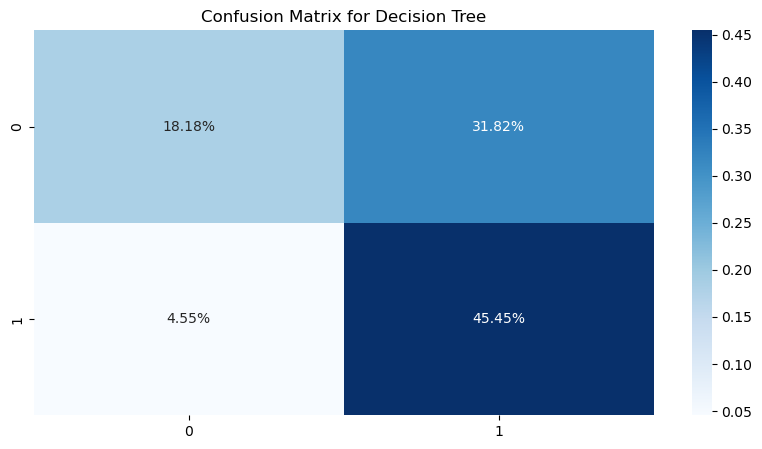

In [77]:
# 3. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Print classification report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, dt_predictions))

# Print accuracy score
print(f"Accuracy Score for Decision Tree: {accuracy_score(y_test, dt_predictions):.2f}\n")

# Create and display confusion matrix
dt_cm = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(10, 5))
sns.heatmap(dt_cm / np.sum(dt_cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix for Decision Tree")
plt.show()


Classification Report for AdaBoost Classifier:
              precision    recall  f1-score   support

       False       1.00      0.91      0.95        11
        True       0.92      1.00      0.96        11

    accuracy                           0.95        22
   macro avg       0.96      0.95      0.95        22
weighted avg       0.96      0.95      0.95        22

Accuracy Score for AdaBoost Classifier: 0.95



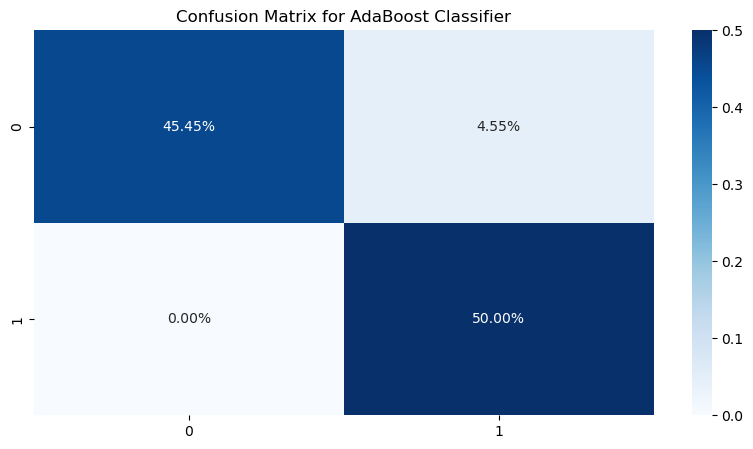

In [78]:
# 4. AdaBoost Classifier
adaboost_model = AdaBoostClassifier(random_state=42, algorithm='SAMME')

# Fit the model
adaboost_model.fit(X_train, y_train)

# Make predictions
adaboost_predictions = adaboost_model.predict(X_test)

# Print classification report
print("\nClassification Report for AdaBoost Classifier:")
print(classification_report(y_test, adaboost_predictions))

# Print accuracy score
print(f"Accuracy Score for AdaBoost Classifier: {accuracy_score(y_test, adaboost_predictions):.2f}\n")

# Create and display confusion matrix
adaboost_cm = confusion_matrix(y_test, adaboost_predictions)
plt.figure(figsize=(10, 5))
sns.heatmap(adaboost_cm / np.sum(adaboost_cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix for AdaBoost Classifier")
plt.show()



Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96        11
        True       1.00      0.91      0.95        11

    accuracy                           0.95        22
   macro avg       0.96      0.95      0.95        22
weighted avg       0.96      0.95      0.95        22

Accuracy Score for Gaussian Naive Bayes: 0.95



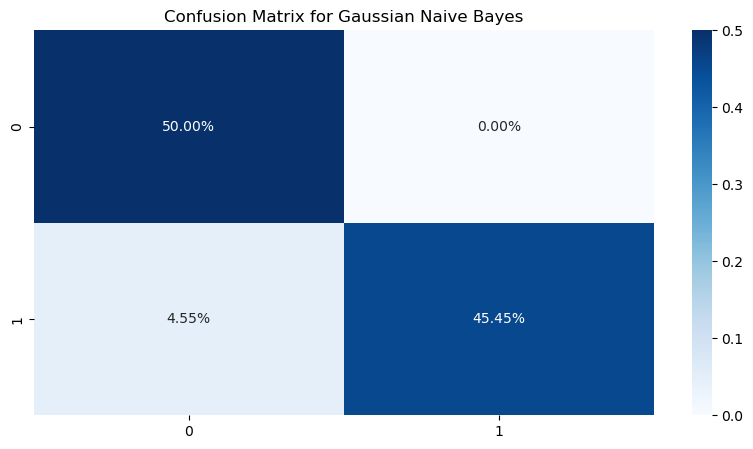

In [79]:

# 5. Gaussian Naive Bayes
gaussian_model = GaussianNB()

# Fit the model
gaussian_model.fit(X_train, y_train)

# Make predictions
gaussian_predictions = gaussian_model.predict(X_test)

# Print classification report
print("\nClassification Report for Gaussian Naive Bayes:")
print(classification_report(y_test, gaussian_predictions))

# Print accuracy score
print(f"Accuracy Score for Gaussian Naive Bayes: {accuracy_score(y_test, gaussian_predictions):.2f}\n")

# Create and display confusion matrix
gaussian_cm = confusion_matrix(y_test, gaussian_predictions)
plt.figure(figsize=(10, 5))
sns.heatmap(gaussian_cm / np.sum(gaussian_cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix for Gaussian Naive Bayes")
plt.show()



Classification Report for SVM (Linear Kernel):
              precision    recall  f1-score   support

       False       1.00      0.73      0.84        11
        True       0.79      1.00      0.88        11

    accuracy                           0.86        22
   macro avg       0.89      0.86      0.86        22
weighted avg       0.89      0.86      0.86        22

Accuracy Score for SVM (Linear Kernel): 0.86



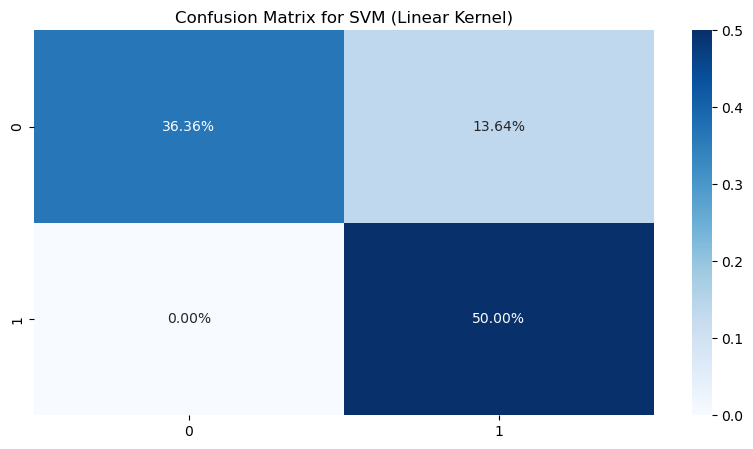

In [80]:
# 6. Support Vector Machine (SVM)
# SVM with linear kernel
svm_linear = SVC(kernel='linear', random_state=42)

# Fit the model
svm_linear.fit(X_train, y_train)

# Make predictions
svm_linear_predictions = svm_linear.predict(X_test)

# Print classification report
print("\nClassification Report for SVM (Linear Kernel):")
print(classification_report(y_test, svm_linear_predictions))

# Print accuracy score
print(f"Accuracy Score for SVM (Linear Kernel): {accuracy_score(y_test, svm_linear_predictions):.2f}\n")

# Create and display confusion matrix
svm_linear_cm = confusion_matrix(y_test, svm_linear_predictions)
plt.figure(figsize=(10, 5))
sns.heatmap(svm_linear_cm / np.sum(svm_linear_cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix for SVM (Linear Kernel)")
plt.show()


Classification Report for SVM (RBF Kernel):
              precision    recall  f1-score   support

       False       1.00      0.82      0.90        11
        True       0.85      1.00      0.92        11

    accuracy                           0.91        22
   macro avg       0.92      0.91      0.91        22
weighted avg       0.92      0.91      0.91        22

Accuracy Score for SVM (RBF Kernel): 0.91



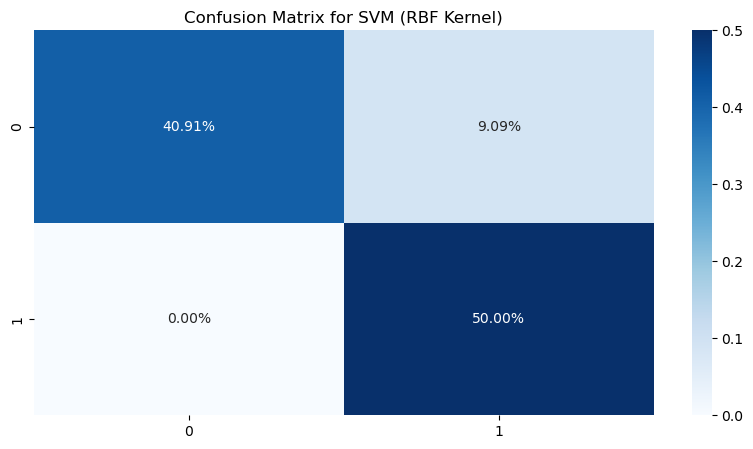

In [81]:
# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# Fit the model
svm_rbf.fit(X_train, y_train)

# Make predictions
svm_rbf_predictions = svm_rbf.predict(X_test)

# Print classification report
print("\nClassification Report for SVM (RBF Kernel):")
print(classification_report(y_test, svm_rbf_predictions))

# Print accuracy score
print(f"Accuracy Score for SVM (RBF Kernel): {accuracy_score(y_test, svm_rbf_predictions):.2f}\n")

# Create and display confusion matrix
svm_rbf_cm = confusion_matrix(y_test, svm_rbf_predictions)
plt.figure(figsize=(10, 5))
sns.heatmap(svm_rbf_cm / np.sum(svm_rbf_cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix for SVM (RBF Kernel)")
plt.show()


Classification Report for SVM (Sigmoid Kernel):
              precision    recall  f1-score   support

       False       1.00      0.82      0.90        11
        True       0.85      1.00      0.92        11

    accuracy                           0.91        22
   macro avg       0.92      0.91      0.91        22
weighted avg       0.92      0.91      0.91        22

Accuracy Score for SVM (Sigmoid Kernel): 0.91



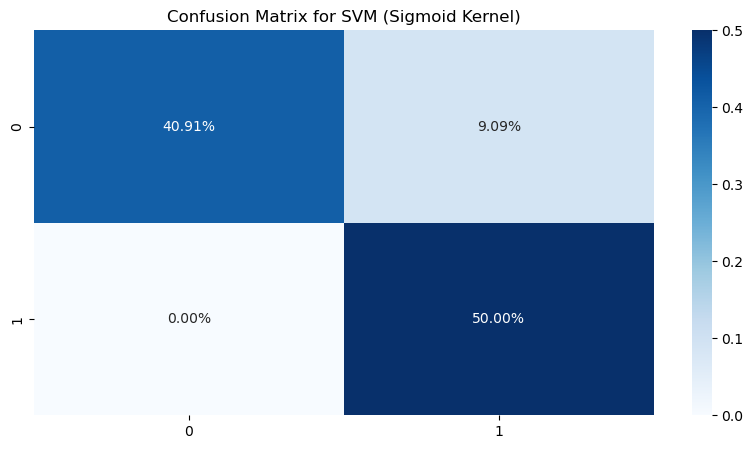

In [82]:
# SVM with Sigmoid kernel
svm_sigmoid = SVC(kernel='sigmoid', random_state=42)

# Fit the model
svm_sigmoid.fit(X_train, y_train)

# Make predictions
svm_sigmoid_predictions = svm_sigmoid.predict(X_test)

# Print classification report
print("\nClassification Report for SVM (Sigmoid Kernel):")
print(classification_report(y_test, svm_sigmoid_predictions))

# Print accuracy score
print(f"Accuracy Score for SVM (Sigmoid Kernel): {accuracy_score(y_test, svm_sigmoid_predictions):.2f}\n")

# Create and display confusion matrix
svm_sigmoid_cm = confusion_matrix(y_test, svm_sigmoid_predictions)
plt.figure(figsize=(10, 5))
sns.heatmap(svm_sigmoid_cm / np.sum(svm_sigmoid_cm), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix for SVM (Sigmoid Kernel)")
plt.show()

In [83]:
#comparison of model performance
# Define models and their accuracy scores
models = ["KNN", "MLP", "Decision Tree", "AdaBoost", "SVM (Linear)", "SVM (RBF)", "SVM (Sigmoid)"]
accuracies = [
    accuracy_score(y_test, knn_predictions),
    accuracy_score(y_test, mlp_predictions),
    accuracy_score(y_test, dt_predictions),
    accuracy_score(y_test, adaboost_predictions),
    accuracy_score(y_test, svm_linear_predictions),
    accuracy_score(y_test, svm_rbf_predictions),
    accuracy_score(y_test, svm_sigmoid_predictions)
]

# Create a summary table of accuracy scores
performance_df = pd.DataFrame({"Model": models, "Accuracy": accuracies})
print("\nModel Performance Summary:")
print(performance_df)



Model Performance Summary:
           Model  Accuracy
0            KNN  0.772727
1            MLP  0.909091
2  Decision Tree  0.636364
3       AdaBoost  0.954545
4   SVM (Linear)  0.863636
5      SVM (RBF)  0.909091
6  SVM (Sigmoid)  0.909091
